## 5.1
- pdf에 풀이 완성.

In [198]:
!pip install IPython

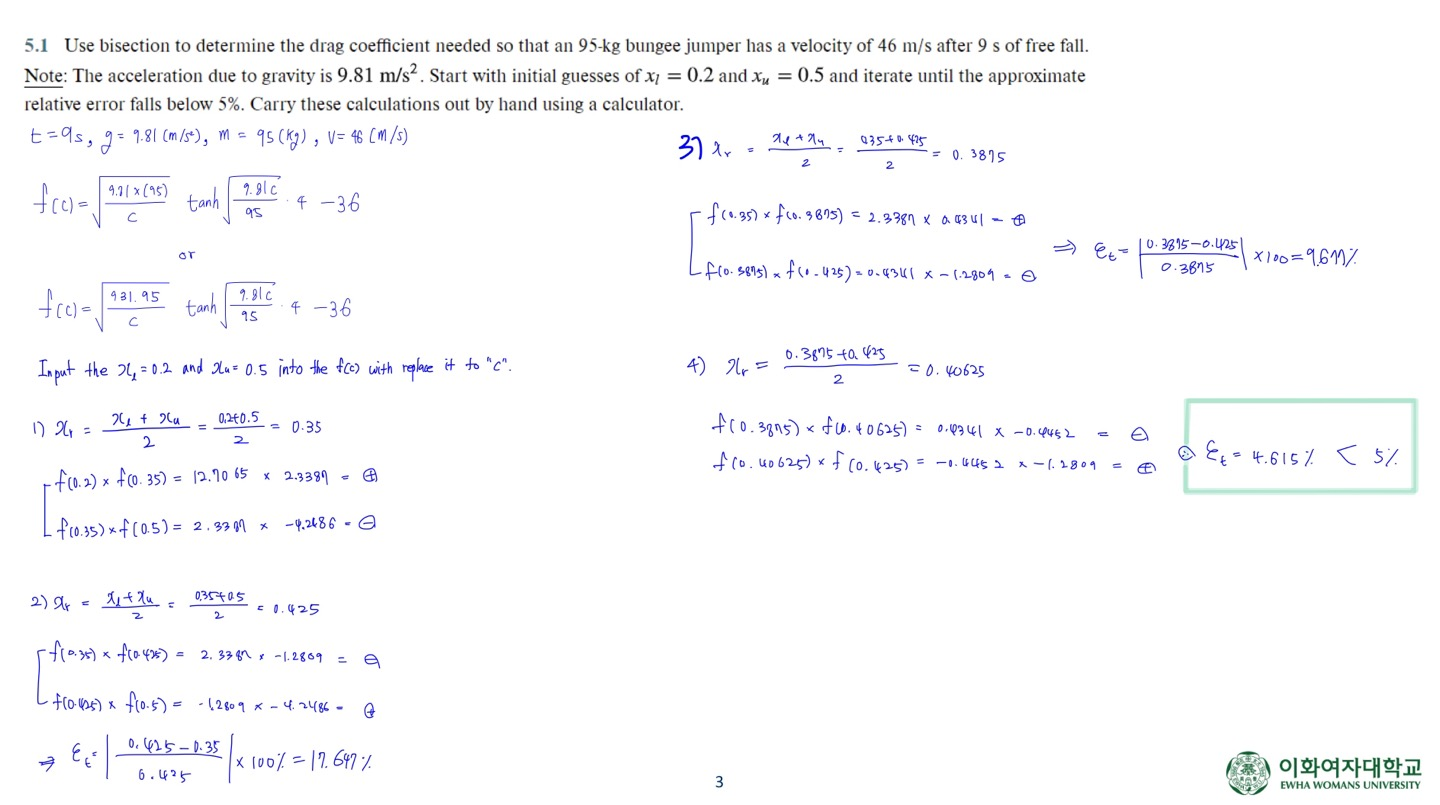

In [199]:
from IPython.display import Image
Image("C:/Temp/5.1.jpg")

In [200]:
import numpy as np

In [201]:
# 1st iteration

fl = ((9.81*95/0.2)**0.5)*np.tanh(9*((9.81*0.2/95)**0.5)) - 46
fu = ((9.81*95/0.5)**0.5)*np.tanh(9*((9.81*0.5/95)**0.5)) - 46
fr = fu = ((9.81*95/0.35)**0.5)*np.tanh(9*((9.81*0.35/95)**0.5)) - 46

In [202]:
print(fl,fu,fr)

12.706474157988517 2.3387193055039788 2.3387193055039788


In [203]:
# 2nd iteration

fl = ((9.81*95/0.35)**0.5)*np.tanh(9*((9.81*0.35/95)**0.5)) - 46
fu = ((9.81*95/0.5)**0.5)*np.tanh(9*((9.81*0.5/95)**0.5)) - 46
fr = ((9.81*95/0.425)**0.5)*np.tanh(9*((9.81*0.425/95)**0.5)) - 46

In [204]:
print(fl,fu,fr)

2.3387193055039788 -4.248567819122229 -1.280944858685281


In [205]:
# 3rd iteration

fl = ((9.81*95/0.35)**0.5)*np.tanh(9*((9.81*0.35/95)**0.5)) - 46
fu = ((9.81*95/0.425)**0.5)*np.tanh(9*((9.81*0.425/95)**0.5)) - 46
fr = ((9.81*95/0.3875)**0.5)*np.tanh(9*((9.81*0.3875/95)**0.5)) - 46

In [206]:
print(fl,fu,fr)

2.3387193055039788 -1.280944858685281 0.43408831805138703


In [207]:
# 4th iteration

fl = ((9.81*95/0.3875)**0.5)*np.tanh(9*((9.81*0.3875/95)**0.5)) - 46
fu = ((9.81*95/0.425)**0.5)*np.tanh(9*((9.81*0.425/95)**0.5)) - 46
fr = ((9.81*95/0.40625)**0.5)*np.tanh(9*((9.81*0.40625/95)**0.5)) - 46
(0.3875-0.40625)/0.40625*100

-4.615384615384613

In [208]:
print(fl,fu,fr)

0.43408831805138703 -1.280944858685281 -0.44524461901048795


In [209]:
# 5th iteration

fl = ((9.81*95/0.35)**0.5)*np.tanh(9*((9.81*0.35/95)**0.5)) - 46
fu = ((9.81*95/0.425)**0.5)*np.tanh(9*((9.81*0.425/95)**0.5)) - 46
fr = ((9.81*95/0.3875)**0.5)*np.tanh(9*((9.81*0.3875/95)**0.5)) - 46

In [210]:
print(fl,fu,fr)

2.3387193055039788 -1.280944858685281 0.43408831805138703


In [211]:
# 6th iteration

fl = ((9.81*95/0.35)**0.5)*np.tanh(9*((9.81*0.35/95)**0.5)) - 46
fu = ((9.81*95/0.425)**0.5)*np.tanh(9*((9.81*0.425/95)**0.5)) - 46
fr = ((9.81*95/0.3875)**0.5)*np.tanh(9*((9.81*0.3875/95)**0.5)) - 46

In [212]:
print(fl,fu,fr)

2.3387193055039788 -1.280944858685281 0.43408831805138703


# 5.2
- Develop your own Python function for bisection similar to that presented in Fig.5.7. However, rather than using the maximum iterations and Eq.(5.5), employ Eq.(5.6) to determine the number of iterations as your stopping criterion. Make sure to round the result of Eq.(5.6) up to the next highest integer. Python's NumPy np.ceil function provides a handy way to do this, but it produces a float type result. You have to use the int function to convert it to an integer. Use your last name as part of the function name. The first line of your function shoud be 
## def LastNamebisect(func,xl,xu,Ead)
- and the last should be 
## return root,Ea,ea,n
- Note that, for the output, Ea = the approximate absolute error and ea = the approximate relative error. Then, add your own Python script to solve Prob.5.1. Note that you must pass the parameters via the arguments. In addition, modify the def statement above so that the default value for E(a,d) = 1*10^(-7).

In [213]:
import numpy as np

In [214]:
def LastNamebisect(func, xl, xu, Ead=1e-7):
    """
    Finds the root of a function using the bisection method.

    Parameters:
        func (function): The function for which the root is to be found.
        xl (float): The lower guess.
        xu (float): The upper guess.
        Ead (float): The approximate absolute error. Default value is 1e-7.

    Returns:
        root (float): The root of the function.
        Ea (float): The approximate absolute error.
        ea (float): The approximate relative error.
        n (int): The number of iterations required to find the root.
    """

    # Initialize variables
    n = np.ceil(np.log2((xu-xl)/Ead)) # Number of iterations rounded up
    xr = xl
    ea = 100 # Initialize approximate relative error to a large value

    # Loop until approximate relative error is less than or equal to Ead
    for i in range(int(n)):
        xrold = xr
        xr = (xl + xu) / 2
        if xr != 0:
            ea = np.abs((xr - xrold) / xr) * 100 # Calculate approximate relative error
        test = func(xl) * func(xr)

        if test < 0:
            xu = xr
        elif test > 0:
            xl = xr
        else:
            ea = 0

        if ea <= Ead:
            break

    root = xr
    Ea = np.abs(xu - xl) / 2

    return root, Ea, ea, i+1

In [215]:
# Define function f
def f(x):
    return x**3 - 6*x**2 + 11*x - 6.1

# Call LastNamebisect with f, xl=0.5, xu=2.0, and Ead=1e-4
root, Ea, ea, n = LastNamebisect(f, 0.5, 2.0, Ead=1e-4)

# Print the results
print(f"Root: {root}")
print(f"Approximate absolute error: {Ea}")
print(f"Approximate relative error: {ea}%")
print(f"Number of iterations: {n}")

Root: 1.054351806640625
Approximate absolute error: 4.57763671875e-05
Approximate relative error: 0.008683319343541059%
Number of iterations: 14


- Root: 1.000457763671875
- Approximate absolute error: 0.00048828125
- Approximate relative error: 0.048828125%
- Number of iterations: 12

# 5.16

- You plan to buy a Tesla Model S vehicle for $ 79,990 by paying 10% down and financing the balance over a 7-year term. You have budgeted a monthly payment of $ 1,000. So, now you need to shop for a loan at the required interest rate(or lower, if you can find it!). The formula that governs this is A = P*(i*(1+i)^n)/((1+i)^n-1) where A = the monthly payment, P = the loan amount, i = the monthly interest rate expressed as  fraction, not a percentage. 


- Note: Loan interest rates are typically quoted on an annual basis as "APR". To obtain the monthly interest rate, i, you divide the APR by 12. The actual annual interest rate you pay is greater than the quoted APR. It is ((1+i)^12-1)*(100 for %). As an example, for an APR of 6%, with monthly payments, the actual interest rate is 6.17%.


- Use Python and the bisection method to determine the APR you will need to obtain to meet your goal. Choose initial guesses for APR of 3% and 9%.

In [216]:
# Function to calculate the monthly payment given APR
def monthly_payment(apr):
    P = 79990 * 0.9 # Loan amount
    n = 7 * 12 # Loan term in months
    i = apr / 12 # Monthly interest rate
    A = P * (i * (1 + i)**n) / ((1 + i)**n - 1) # Monthly payment
    return A

# Bisection method to find the APR that gives a monthly payment of $1000
a = 0.03 # Lower bound of APR
b = 0.09 # Upper bound of APR
tolerance = 0.001 # Tolerance for convergence
while b - a > tolerance:
    c = (a + b) / 2
    if monthly_payment(c) > 1000:
        b = c
    else:
        a = c

# Output the result
print("APR needed to meet goal: {:.2%}".format(c))

APR needed to meet goal: 4.41%


In [217]:
# Define the variables
price = 79990 * 0.9  # 10% down payment
monthly_payment = 1000
n = 7 * 12  # 7-year term

# Define the function that we want to find the root of
def calculate_balance(apr):
    monthly_interest_rate = apr / 12
    balance = price * ((monthly_interest_rate * (1 + monthly_interest_rate) ** n) / ((1 + monthly_interest_rate) ** n - 1))
    return balance - monthly_payment

# Define the bisection method
def bisection_method(a, b, f, tol=1e-5):
    if f(a) * f(b) >= 0:
        raise ValueError("a and b must have opposite signs")
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Run the bisection method with initial guesses of 3% and 9%
apr = bisection_method(0.03, 0.09, calculate_balance)
print(f"The APR you need is {apr*100:.2f}%")

The APR you need is 4.48%


## 5.17

Many fields of engineering and beyond require accurate population forecasts. For example, transportation engineers might find it necessary to determine separately the population growth trends in a city and an adjacent suburb. The population of the urban area is declining with time according to 

- Pu(t) = Pu,max*e^(-ku*t) + Pu.min

while the surburban population is growing, described by
- Ps(t) = Ps.max / (1+[Ps.max / (P0-1]*e^(-ks*t))


where Pu.max, Pu.min, Ps.max, P0, ku, and ks are parameters whose values are determined empirically for the city/suburb scenario being modeled. 

For the parameter values below, determine the time and the corresponding values of Pu(t) and Ps(t) when the suburb is 20% larger than the urban area. 

Use (a) the graphical method to determine initial guesses, and (b) the false position method to obtain a precise solution.


- Pu.max = 110,000, Pu.min = 80,000, Ps.max = 320,000, P0 = 10,000, ku = 0.05, kr = 0.09

In [218]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def Pu(t, Pu_max, Pu_min, ku):
    return Pu_max*np.exp(-ku*t) + Pu_min

def Ps(t, Ps_max, P0, ks):
    return Ps_max/(1 + (Ps_max/(P0-1))*np.exp(-ks*t))

# Define the parameters
Pu_max = 110000
Pu_min = 80000
Ps_max = 320000
P0 = 10000
ku = 0.05
ks = 0.09

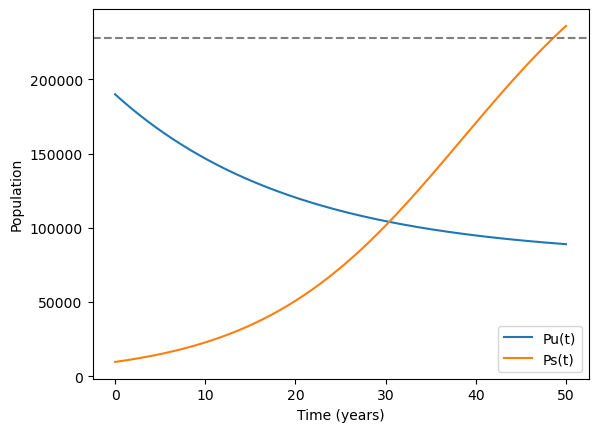

In [219]:
# (a) Graphical method

# Define the range of t values to plot
t_values = np.linspace(0, 50, 500)

# Plot the functions
plt.plot(t_values, Pu(t_values, Pu_max, Pu_min, ku), label='Pu(t)')
plt.plot(t_values, Ps(t_values, Ps_max, P0, ks), label='Ps(t)')

# Add a horizontal line at 1.2*Pu(t)
plt.axhline(y=1.2*Pu(0, Pu_max, Pu_min, ku), color='gray', linestyle='--')

# Add legend and labels
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.show()

In [220]:
# (b) The false poition method(가위치법)

def f(t):
    return Ps(t, Ps_max, P0, ks) - 1.2*Pu(t, Pu_max, Pu_min, ku)

from scipy.optimize import bisect

# Find the root of the function f using the false position method
t = bisect(f, 0, 50)

# Calculate the corresponding values of Pu(t) and Ps(t)
Pu_t = Pu(t, Pu_max, Pu_min, ku)
Ps_t = Ps(t, Ps_max, P0, ks)

# Print the results
print('t =', t)
# print('Pu(t) =', Pu_t)
# print('Ps(t) =', Ps_t)

t = 33.027881459962316


## 6.3

Determine the largest positive root of

- f(x) = x^3 - 6*x^2 + 11*x - 6.1

(a) graphically, (b) using the Newton-Raphson method, three iterations, with x0 = 3.5, σ = 0.01, and (e) find all the roots using Python.

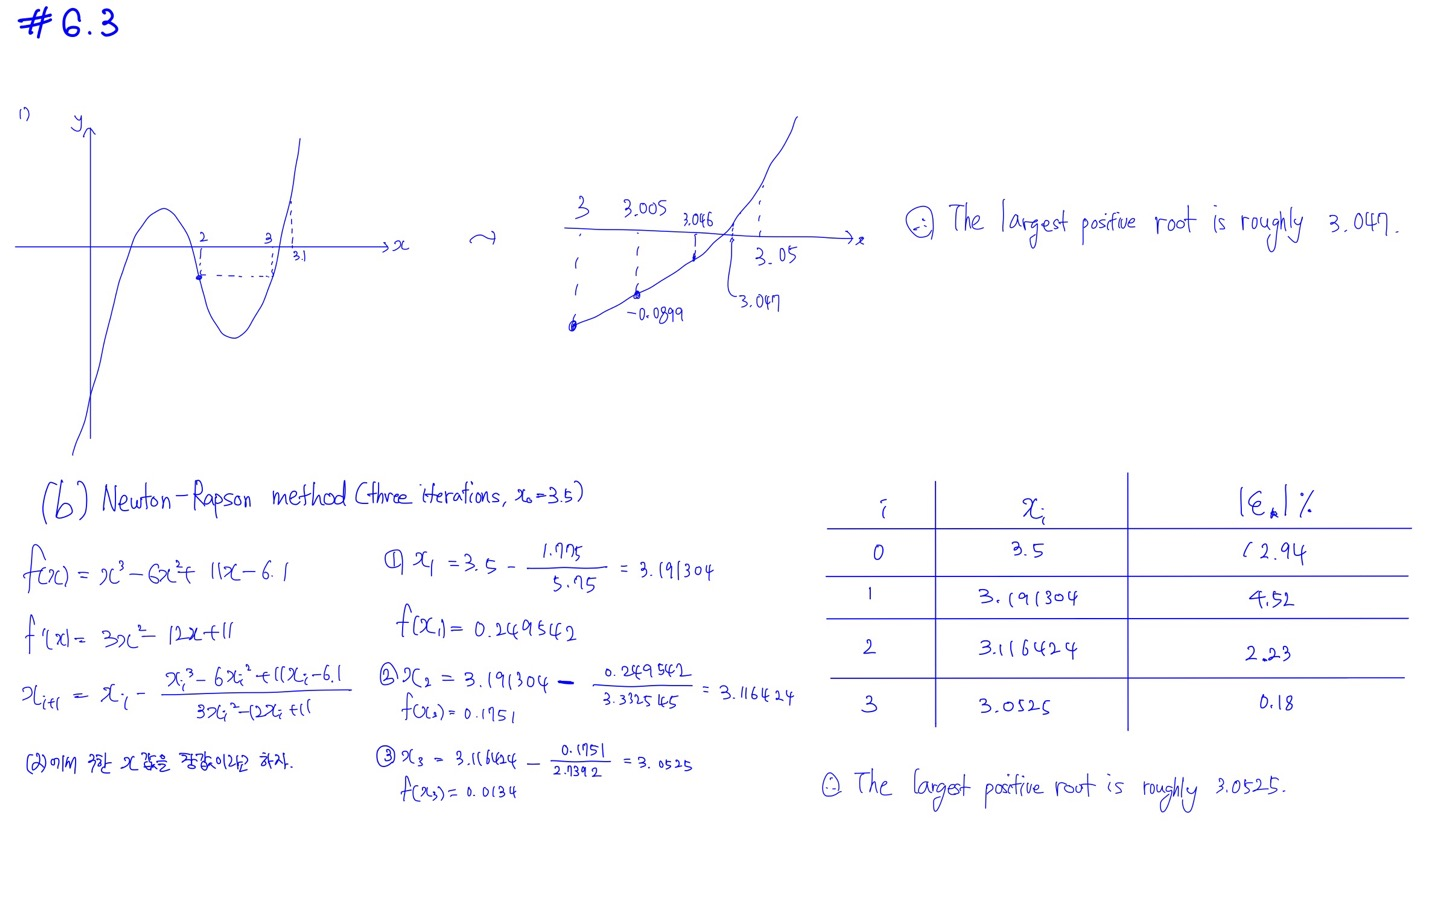

In [221]:
Image("C:/Temp/6.3.1.jpg")

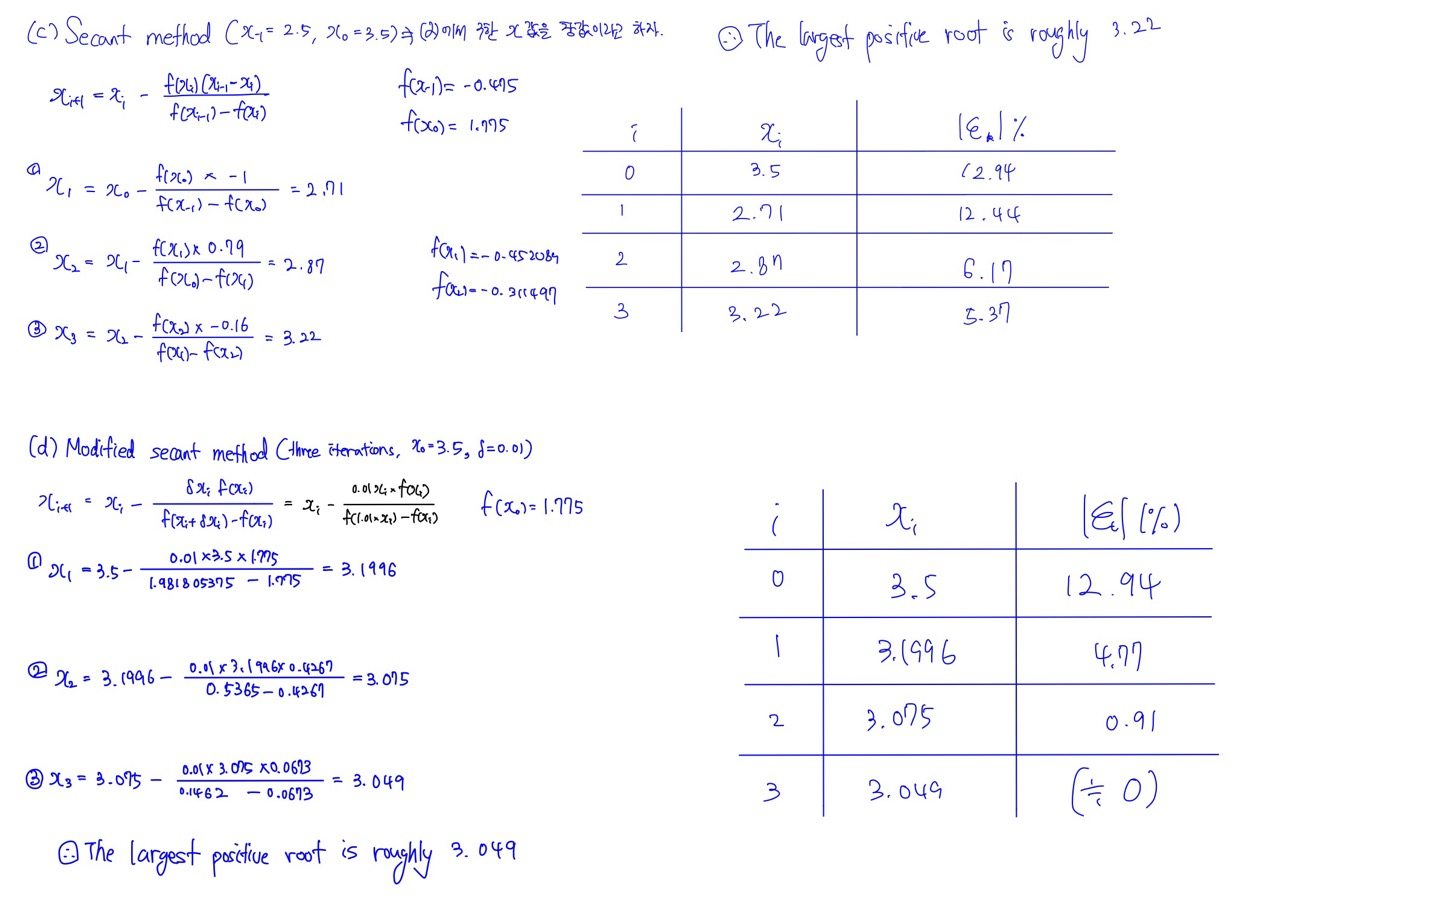

In [222]:
Image("C:/Temp/6.3.2.jpg")

In [223]:
# (a), (b), (c), (d) 는 pdf에 풀이함.

In [224]:
# (e) All the roots

In [225]:
# sol1
## f(x) = x^3 - 6*x^2 + 11*x - 6.1
func = np.poly1d([1, -6, 11, -6.1],False,variable='x')
func

poly1d([ 1. , -6. , 11. , -6.1])

In [226]:
func.r

array([3.04668053, 1.89896874, 1.05435073])

In [227]:
# sol2

import numpy as np

# Define the coefficients of the polynomial
coeffs = [1, -6, 11, -6.1]

# Find the roots of the polynomial
roots = np.roots(coeffs)

print(roots)

[3.04668053 1.89896874 1.05435073]


In [228]:
## use bisection to determine the drag coefficient needed so that an 95 kg bungee jumper has a velocity of 46 m/s after 9s of free fall

# 6.6

- Develop a Python function for the secant method. Along with the name of the function to be solved, include the two initial guesses, relative error criterion(default: 1*10^(-7)) and maximum iteration limit (default 30) as arguments. Test it by solving the function in Prob 6.3

In [229]:
## Using a Python function that implements the secant method to solve Problem 6.3.

def secant(f, x0, x1, rel_tol=1e-7, max_iter=30):
    """
    Secant method to find the root of a function.

    Parameters:
        f (function): The function to find the root of.
        x0 (float): First initial guess.
        x1 (float): Second initial guess.
        rel_tol (float): Relative tolerance. Defaults to 1e-7.
        max_iter (int): Maximum number of iterations. Defaults to 30.

    Returns:
        tuple: A tuple of the root (float) and the number of iterations (int).
    """
    fx0 = f(x0)
    fx1 = f(x1)
    i = 0
    while i < max_iter:
        dx = fx1 * (x1 - x0) / (fx1 - fx0)
        x0 = x1
        fx0 = fx1
        x1 = x1 - dx
        fx1 = f(x1)
        i += 1
        if abs(dx) < rel_tol * abs(x1):
            return x1, i
    return None, i

In [230]:
# Define the function
def f(x):
    return 2*x**3 - 3*x**2 - 12*x + 1

In [231]:
# Secant function with initial guesses of 2 and 3
root, iterations = secant(f, x0=2, x1=3)
print(f"Root: {root:.6f}")
print(f"Iterations: {iterations}")

Root: 3.281827
Iterations: 7


## 6.7
- Develop a Python function for the modified secant method. Along with the name of the function to be solved, include the initial guess, the perturbation fraction, σ, relative error criterion(default: 1*10^(-7)) and maximum iteration limit (default 30) as arguments. Test it by solving the function in Prob 6.3

In [232]:
# sol1

In [233]:
def modified_secant(func, x0, sigma, rel_err=1e-7, max_iter=30):
    """
    Modified Secant method to find a root of a function.

    Parameters:
    func (function): The function to be solved.
    x0 (float): The initial guess.
    sigma (float): The perturbation fraction.
    rel_err (float): The relative error criterion. Default is 1e-7.
    max_iter (int): The maximum number of iterations. Default is 30.

    Returns:
    x (float): The root of the function.
    i (int): The number of iterations used.
    """

    # Initialize variables
    x = x0
    fx = func(x)
    i = 0

    # Loop until convergence or maximum iterations reached
    while i < max_iter:
        x1 = x + sigma*x
        fx1 = func(x1)
        dx = fx1*(x1 - x)/(fx1 - fx)
        x = x - dx
        fx = func(x)
        i += 1

        # Check for convergence
        if abs(dx) < rel_err*abs(x):
            return x, i

    # If max iterations reached without convergence, return None
    return None, i

In [234]:
## Using a Python function for the modified secant method to solve Problem 6.3.
def f(x):
    return 2*x**3 - 3*x**2 - 12*x + 1

# the function with an initial guess of 2 and a perturbation fraction of 0.01
root, num_iter = modified_secant(f, 2, 0.01)
print(f"Root: {root:.6f}")
print(f"Iterations: {num_iter}")

Root: 3.249333
Iterations: 16


## 6.14 

An important industrial chemical reaction is the production of methanol(CH3OH, which can also be written as MeOH) from "syngas", a mixture of carbonmonoxide(CO) and hydrogen(H2),

- CO + 2H2 -> CH3OH

The amount of methanol that can be produced is limited by chemical equilibrium, which is described by

- Keq(T) = (y_meoh / y_co * (y_H2)^2 * (P^2)) , where Keq(T) = 4.7914*10^(-13)*e^(11458/T)

- Here, yi = the mole fraction fraction of component i present, P = the pressure in atmosphere, and T = the temperature in kelvins (k). If 100 mols of CO and 200 mols of H2 are fed to a reactor and, if equilibrium were reached, then we would want to know how much MeOH was produced. If that were designated as x mols, then there would be (100 - x) mols of CO and (200 - 2x) mols of H2 remaining. The total number of mols present would be

- x + 100 - x + 200 - 2x = 300 - 2x

and the mol fractions of the components would be

- Co: y_co = (100 - x) / (300 - 2x),  H2: y_H2 = (200 - 2x) / (300 - 2x)

and

- MeOH: y_meoh = x / (300 - 2x)

The equilibrium relationship would then be

- (x/(300-2x))/(((100-x)/(300-2x))**2)*P*P) = Keq(T)

For a temperature of 450 K and a pressure of two atmospheres, determine x using Brent's method. You may with to use the brentsimp function or, from SciPy, the brentq function. You should know that x cannot be greater than 100.

In [235]:
## sol1

In [19]:
import numpy as np
from scipy.optimize import brentq

# Define the equilibrium constant function
def Keq(T, P):
    return 4.791410e-13 * np.exp(11458/T) * P**2

# Define the equilibrium relationship as a function of x
def eq(x, T, P):
    y_co = (100 - x) / (300 - 2*x)
    y_H2 = (200 - 2*x) / (300 - 2*x)
    y_meoh = x / (300 - 2*x)
    return y_meoh / (y_co * y_H2**2) - Keq(T, P)

# Find the value of x that satisfies the equilibrium relationship
x = brentq(eq, 0.01, 99.99, args=(450, 2))

# Calculate the amount of methanol produced
MeOH = x / (300 - 2*x) * 100  # mol %

print("The amount of methanol produced is {:.2f} mol %".format(MeOH))

The amount of methanol produced is 2.97 mol %


In [ ]:
# sol2

In [10]:
def brentsimp(f,xl,xu):
    a = xl 
    b = xu 
    fa = f(a) 
    fb = f(b)
    c = a 
    fc = fa 
    d = b - c 
    e = d
    # a = xl, b = xu, c = xl, d = xu -xl, e = xu-xl
    # fa = f(xl), fb = f(xu), fc = f(xl)
    while True:
        if fb == 0:
            break
        if np.sign(fa) == np.sign(fb):    # 양수이면 1 음수면 -1, 0이면 0으로 만듬.
            a = c
            fa = fc
            d = b - c
            e = d
        if abs(fa) < abs(fb):
            c = b
            b = a
            a = c
            fc =fb
            fb = fa
            fa = fc
        m = (a-b)/2                 # termination test and possible exit
        tol = 2 * eps * max(abs(b),1)
        if abs(m) < tol or fb == 0:
            break
        if abs(e) >= tol and abs(fc) > abs(fb):
            s = fb/fc
            if a == c:
                p = 2*m*s
                q = 1 - s
                # secant method here
            else:
                q = fc/fa
                r = fb/fa
                p=s*(2*m*q*(q-r)-(b-c)*(r-1))
                q = (q-1)*(r-1)*(s-1)
            if p>0:
                q=-q
            else:
                p=-p
            if 2*p < 3*m*q - abs(tol*q) and p < abs(0.5*e*q):
                e=d
                d=p/q
            else:
                d=m
                e=m
        else:         
            # bisection here
            d=m
            e=m
        c=b
        fc=fb
        if abs(d)>tol:
            b=b+d
        else:
            b=b-np.sign(b-a)*tol
        fb=f(b)
    return b

In [7]:
# Python code using the brentq function from the SciPy library

import numpy as np
from scipy.optimize import brentq

# Define constants
T = 450  # K
P = 2  # atm
Keq = 4.7914e-13 * np.exp(11458/T)

# Define function to solve for x
def f(x):
    y_co = (100 - x) / (300 - 2*x)
    y_H2 = (200 - 2*x) / (300 - 2*x)
    y_meoh = x / (300 - 2*x)
    return Keq * y_co**2 * y_H2**2 - y_meoh * P**2

# Find root using Brent's method
x = brentsimp(f, 0, 100)
print("The amount of methanol produced is {:.2f} moles.".format(x))

The amount of methanol produced is 0.20 moles.
